# Customer churn estimation


## Problem Statement:
For any customer centric organization, customer churn/retention analysis is going to be
extremely valuable. It is a market reality that the banks and other financial institutions are
battling to attract each other's customers while retaining their own. Thus, Customer churn
reduction is the central concern of most banking organizations as switching costs to the
customer are low and acquisition cost to the organization is high. Churn reduces profitability
as it means potential loss of future revenue and also losing the invested costs of acquisition.
On the other hand, long term customers contribute to profitability through mere continued
association as they are less costly to serve and through additional services and referrals. It
is important to have data that underlies construction of purchase decision and also the
underlying loyalty hooks. So a good deal of marketing budget is allocated to engage
customer on an ongoing basis and prevent churn by designing new plans and offering
freebees, discounts etc. Thus, it is important to predict the customers who are likely to churn
and develop appropriate modalities for retention.
An international bank has a business problem with customer retention and observed high
churn rates. The bank observed that alarming number of existing customers exit while it is
getting increasingly difficult to acquire new customers. So they want to understand the
hidden patterns in their customer behaviour by use of customer data which has early warning
signs.This helps understand the drivers behind considering an alternative. The variables
could be demographic, perception or behavioural.

## column description


1. CustomerID: Unique customer ID
2. CustomerName: Name of the customer
3. yearofBirth: customer year of birth
4. monthofBirth: customer's month of birth
5. dayofbirth: customers's day of birth
6. Yearofentry: year in which customer has entered the company
7. monthofentry: month in which customer has entered the company
8. dayofentry: day the customer entered the company
9. Gender: gender of the customer
10. Location: branch location of the company
11. Education: level of education of the customer
12. MaritalStatus: marital status of customer
13. Occupation: occupation of the customer
14. Ownhouse: does customer have a own house
15. Creditscore: credit score of the customer
16. AccountBalance: balance available in customers account
17. NumberOfProducts: number of products that customer is associated to
18. IsCreditCardCustomer: does customer own a credit card
19. ActiveMember: is the customer active
20. Salary: salary of the customer
21. Churn: weather the customer has churned or no


In [0]:
#importing required packages 
import pandas as pd  #for dealing with dataframes
import numpy as np   #for better numerical operations
from sklearn.model_selection import train_test_split #to split data into train and validation
from sklearn.preprocessing import StandardScaler #to standardize the numerical data with mean=0 and std_dev=1
import matplotlib.pyplot as plt #to deal with plots
import seaborn as sns #to get better and user friendly plots
import datetime  #to deal with date and time
from datetime import timedelta  #to get change in time between two timestamps
from sklearn.metrics import classification_report,accuracy_score   #to get classification report and accuracy of models

In [0]:
train=pd.read_excel('Train.xlsx')
test=pd.read_excel('Test.xlsx')

In [0]:
test_id=test['CustomerID']

In [0]:
train,val=train_test_split(train,test_size=0.15,random_state=1)

In [0]:
#function to compare different levels in dataframes of train,validation and test
#and returns which dataframe has excess or less levels compared to train.

def compare_train_val_test(train_df,val_df,test_df):
    train_levels=train_df.apply(lambda x: set(x.unique()),axis=0)   #finding differnt levels of each columns in train
    val_levels=val_df.apply(lambda x: set(x.unique()),axis=0)       #similarly for val
    test_levels=test_df.apply(lambda x:set(x.unique()),axis=0)      #and test 
    val_extra=[]   #creating new empty list to store extra levels in validation
    val_missing=[] #new list to store missing levels in validation
    test_extra=[]
    test_missing=[]
    for x1,x2,x3 in zip(train_levels,val_levels,test_levels):
        val_missing.append(x1-x2)
        val_extra.append(x2-x1)
        test_missing.append(x1-x3)
        test_extra.append(x3-x1)
    return pd.DataFrame({'train data types':train_df.dtypes,
                         'val data types':val_df.dtypes,
                         'test data types':test_df.dtypes,
                        'train_missing':train_df.isnull().sum(),
                         'val_missing':val_df.isnull().sum(),
                         'test_missing':test_df.isnull().sum(),
                        '#training levels':train_df.apply(lambda x: x.unique().shape[0],axis=0),
                        '#validation levels':val_df.apply(lambda x: x.unique().shape[0],axis=0),
                        '#testing levels':test_df.apply(lambda x: x.unique().shape[0],axis=0),
                        'val_missing_levels':val_missing,
                         'val_extra_levels':val_extra,
                         'test_missing_levels':test_missing,
                        'test_extra_levels':test_extra})

In [6]:
#churn is not taken into account because for this function we need same number of columns
#but for test we donot have a target variable so we ignore targets from train and validation also
compare_train_val_test(train.loc[:,train.columns!='Churn'],val.loc[:,val.columns!='Churn'],test)

,train data types,val data types,test data types,train_missing,val_missing,test_missing,#training levels,#validation levels,#testing levels,val_missing_levels,val_extra_levels,test_missing_levels,test_extra_levels
CustomerID,object,object,object,0,0,0,6256,1104,1840,"{C4662608, C7394045, C8660888, C6274644, C5094...","{C7798394, C3410603, C8130664, C4813357, C3188...","{C4662608, C8660888, C8108173, C7920018, C5492...","{C8364394, C7169977, C3314141, C6236534, C8670..."
CustomerName,object,object,object,0,0,0,6256,1104,1840,"{Name_6163372, Name_6251511, Name_2184779, Nam...","{Name_5387149, Name_4657294, Name_5981110, Nam...","{Name_6163372, Name_6251511, Name_4178342, Nam...","{Name_8335581, Name_7854878, Name_2134034, Nam..."
yearofBirth,int64,int64,int64,0,0,0,69,60,62,"{1926, 1930, 1933, 1935, 1936, 1937, 1999, 193...",{1934},"{1926, 1930, 1933, 1935, 1936, 1938, 1945}",{}
monthofBirth,int64,int64,int64,0,0,0,12,12,12,{},{},{},{}
dayofBirth,int64,int64,int64,0,0,0,28,28,28,{},{},{},{}
yearofEntry,int64,int64,int64,0,0,0,11,11,11,{},{},{},{}
monthofEntry,int64,int64,int64,0,0,0,12,12,12,{},{},{},{}
dayofEntry,int64,int64,int64,0,0,0,28,28,28,{},{},{},{}
Gender,object,object,object,0,0,0,2,2,2,{},{},{},{}
Location,object,object,object,0,0,0,3,3,3,{},{},{},{}


In [7]:
train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
3986,C6317442,Name_6317442,1981,12,9,2018,3,19,Female,Location12,primary,single,admin.,no,751,151218.98,1,1,1,109309.29,No
79,C8592095,Name_8592095,1975,11,21,2016,4,20,Male,Location11,primary,married,technician,yes,632,100013.51,1,1,0,24275.32,No
2512,C4370149,Name_4370149,1974,6,4,2013,8,25,Female,Location12,unknown,divorced,admin.,no,667,140406.68,2,0,1,57164.19,No
662,C2964384,Name_2964384,1979,6,24,2008,9,14,Female,Location13,unknown,single,admin.,no,850,0.00,2,1,1,143030.09,No
7259,C8118486,Name_8118486,1987,12,21,2011,4,17,Male,Location13,secondary,divorced,technician,no,685,122449.31,2,1,1,180769.55,No


In [8]:
print('shape of train:',train.shape)
print('shape of validation:',val.shape)
print('shape of test:',test.shape)

shape of train: (6256, 21)
shape of validation: (1104, 21)
shape of test: (1840, 20)


In [9]:
train.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                    object
dtype: object

In [10]:
train.describe(include='all')

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256,6256,6256,6256,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256
unique,6256,6256,NaN,NaN,NaN,NaN,NaN,NaN,2,3,4,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C6843419,Name_5211086,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,primary,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3414,3123,1586,2185,2702,3134,NaN,NaN,NaN,NaN,NaN,NaN,4979
mean,NaN,NaN,1979.044277,6.541560,14.607257,2013.004316,6.466912,14.508951,NaN,NaN,NaN,NaN,NaN,NaN,651.556905,76155.918055,1.520780,0.705243,0.506394,99459.800777,NaN
std,NaN,NaN,10.494037,3.436141,8.048117,2.895375,3.432369,8.067615,NaN,NaN,NaN,NaN,NaN,NaN,96.556730,62321.558343,0.577945,0.455970,0.499999,57332.516626,NaN
min,NaN,NaN,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,NaN
25%,NaN,NaN,1974.000000,4.000000,8.000000,2011.000000,4.000000,7.750000,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,50403.620000,NaN
50%,NaN,NaN,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,653.000000,96472.395000,1.000000,1.000000,1.000000,98940.675000,NaN
75%,NaN,NaN,1986.000000,10.000000,22.000000,2016.000000,9.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,718.000000,127202.515000,2.000000,1.000000,1.000000,148784.170000,NaN


In [11]:
train.isnull().sum()
#observation----no null values

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
dtype: int64

(1920, 2019)

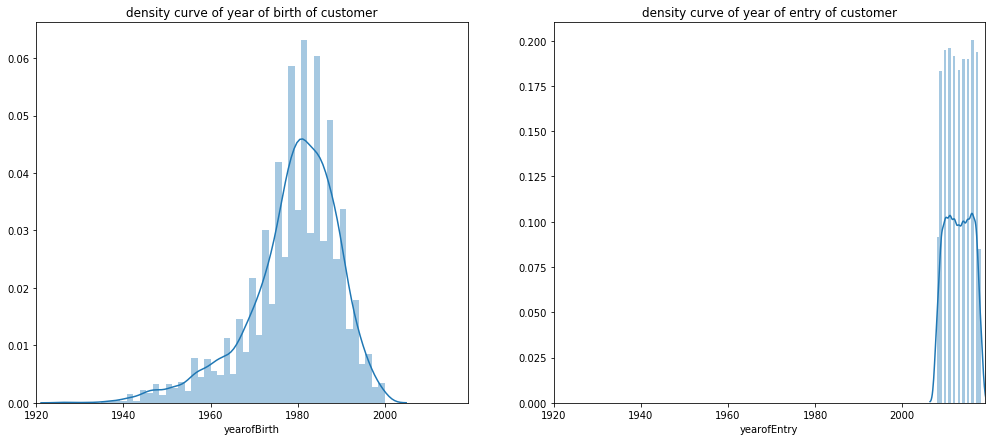

In [12]:
plt.rcParams['figure.figsize']=(17,7)
plt.subplot(1,2,1)
sns.distplot(train.yearofBirth)
plt.title('density curve of year of birth of customer')
plt.xlim(1920,2019)
plt.subplot(1,2,2)
sns.distplot(train.yearofEntry)
plt.title('density curve of year of entry of customer')
plt.xlim(1920,2019)
#plt.tight_layout

#observations----people who get into this companies services are those who were born in
#later half of 20th century 


#company started its services for customers at late 2000's

Text(0.5, 1.0, 'density curve of year of entry')

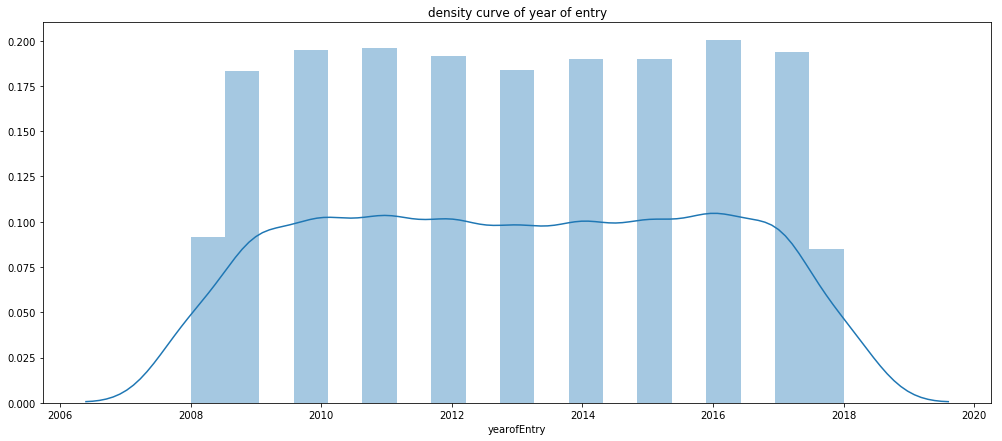

In [13]:
sns.distplot(train.yearofEntry)
plt.title('density curve of year of entry')
#observation-----flow of customers was about constant through out companies establishment.

Text(0.5, 1.0, 'density curve of month of entry of customer into company')

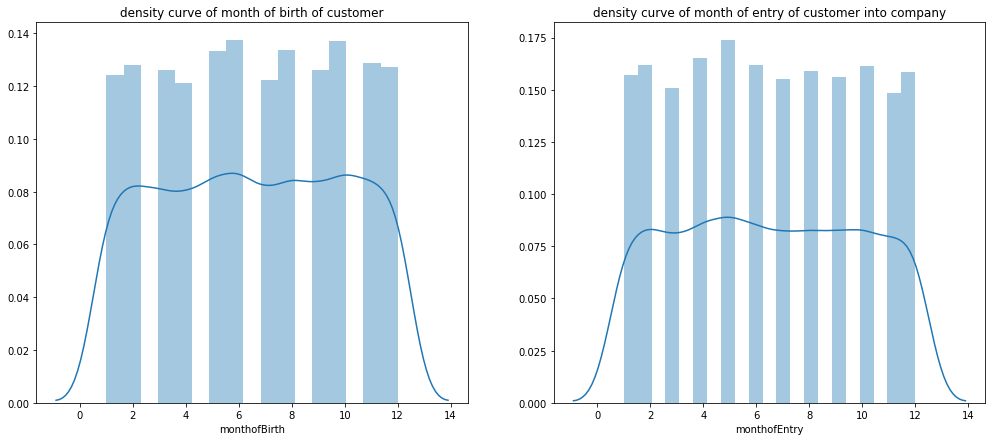

In [14]:
plt.subplot(1,2,1)
sns.distplot(train.monthofBirth)
plt.title('density curve of month of birth of customer')
plt.subplot(1,2,2)
sns.distplot(train.monthofEntry)
plt.title('density curve of month of entry of customer into company')

Text(0.5, 1.0, 'day of entry of customer into company')

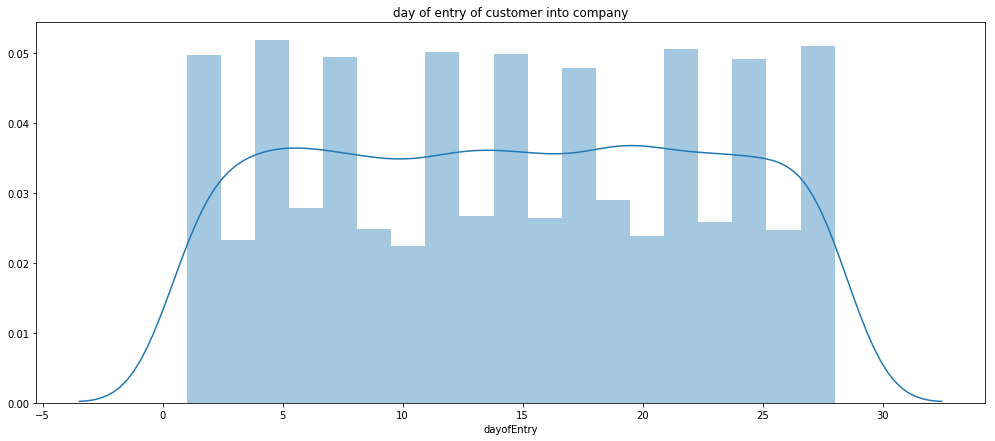

In [15]:
sns.distplot(train.dayofEntry)
plt.title('day of entry of customer into company')

Text(0.5, 1.0, 'count of genders')

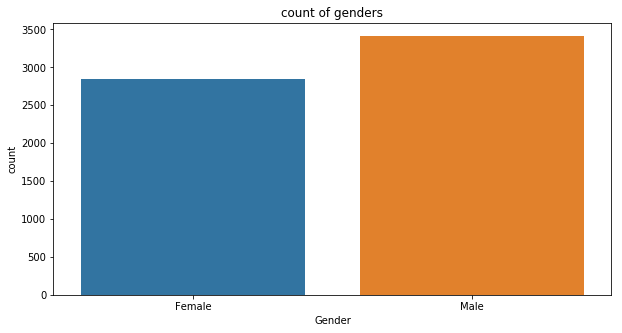

In [16]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot('Gender',data=train)
plt.title('count of genders')

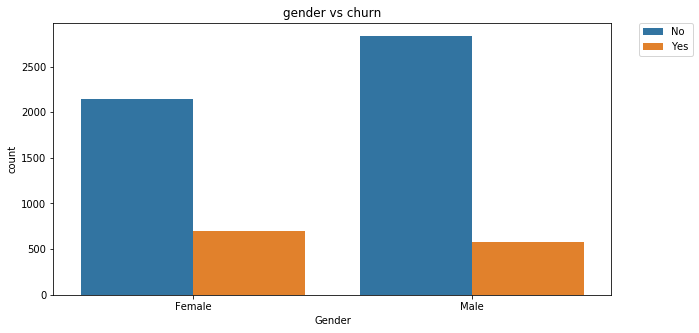

In [17]:
sns.countplot('Gender',data=train,hue='Churn')
plt.title('gender vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)#to place the legend outside the graph
#observations----though there are less female customers but they tend to churn out of the company
#                more than male.

Text(0.5, 1.0, 'location count')

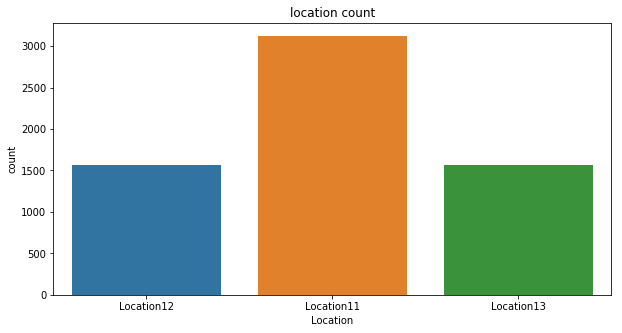

In [18]:
sns.countplot('Location',data=train)
plt.title('location count')
#observations----location-11 has a lot more customers
#                locations 12,13 have equal number of customers but far less when compared to 11.

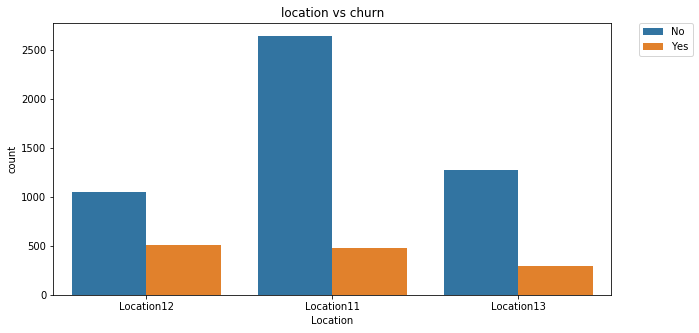

In [19]:
sns.countplot('Location',data=train,hue='Churn')
plt.title('location vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----churn rate is same through all locations.

Text(0.5, 1.0, 'marital status count')

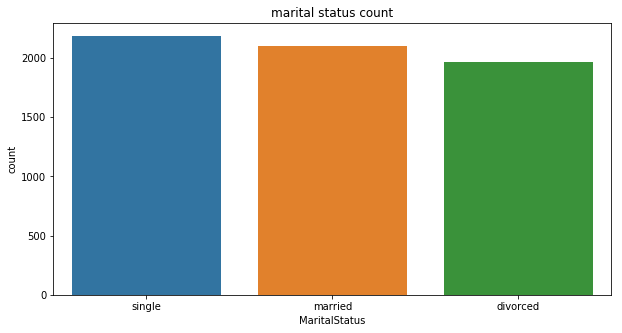

In [20]:
sns.countplot('MaritalStatus',data=train)
plt.title('marital status count')
#observations----marital status of customers are nearly equal single,married,and divorced

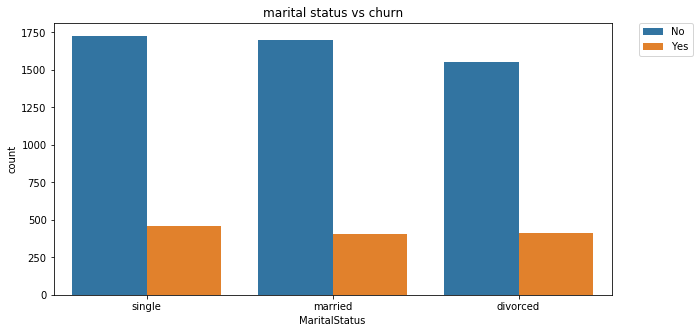

In [21]:
sns.countplot('MaritalStatus',data=train,hue='Churn')
plt.title('marital status vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----churn rate is similar for all marital status.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

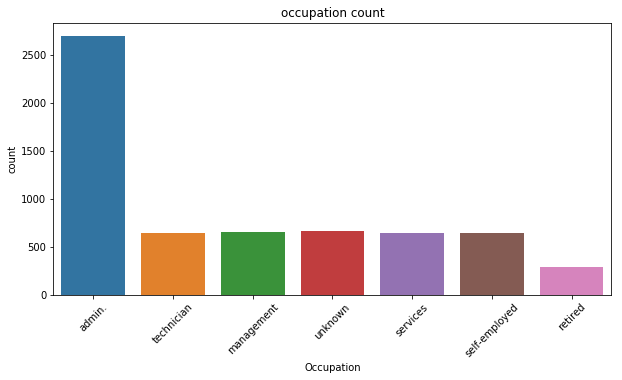

In [22]:
sns.countplot('Occupation',data=train)
plt.title('occupation count')
plt.xticks(rotation=45)
#observations----more customers are into administrative roles
#                all others are equally distributed except retired

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

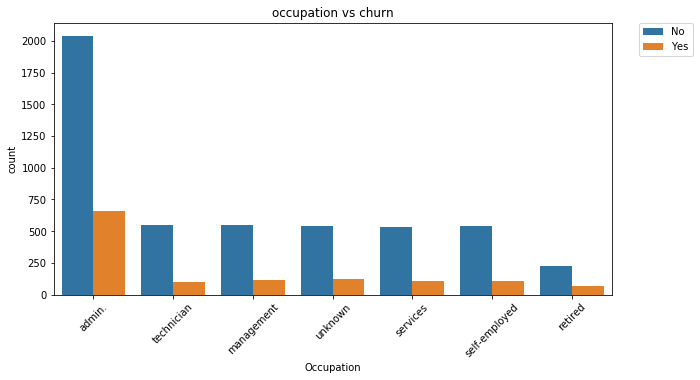

In [23]:
sns.countplot('Occupation',data=train,hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('occupation vs churn')
plt.xticks(rotation=45)
#observations----churn is proportional to occupation count..but a little more for administrative.

Text(0.5, 1.0, 'education count')

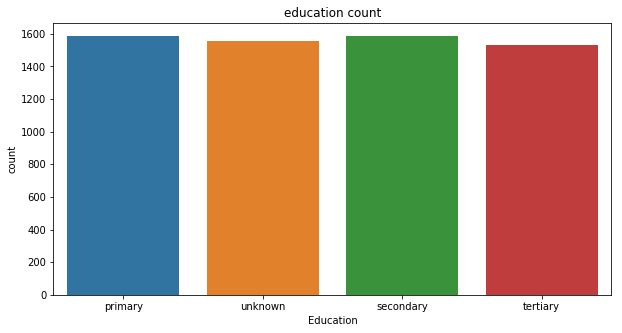

In [24]:
sns.countplot(x='Education',data=train)
plt.title('education count')
#observations----all educational levels have similar count

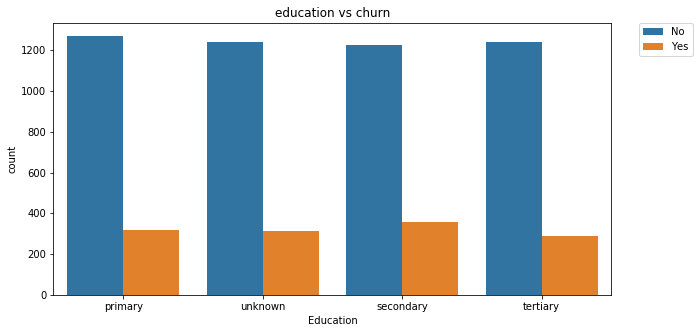

In [25]:
sns.countplot(x='Education',data=train,hue='Churn')
plt.title('education vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----churn is similar in all education levels

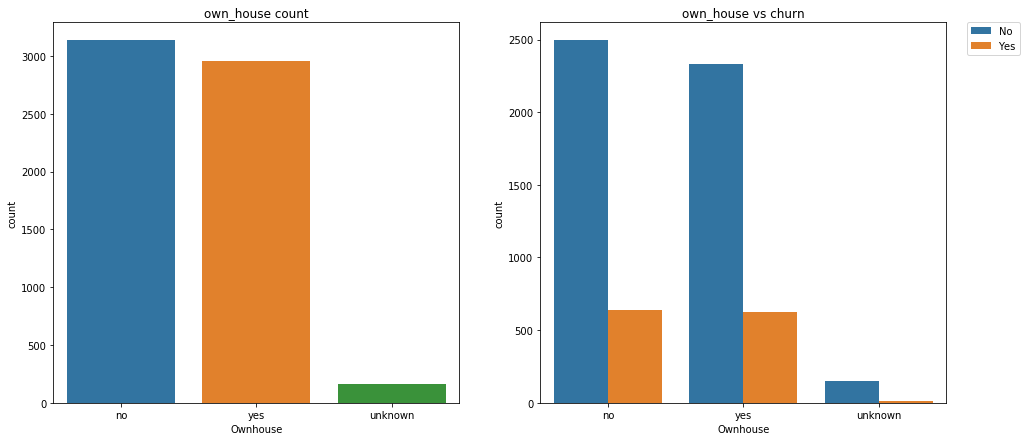

In [26]:
plt.rcParams['figure.figsize']=(16,7)
plt.subplot(1,2,1)
sns.countplot('Ownhouse',data=train)
plt.title('own_house count')
plt.subplot(1,2,2)
sns.countplot('Ownhouse',data=train,hue='Churn')
plt.title('own_house vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----own house count and churn are nearly similar. 

Text(0.5, 1.0, 'density plot of credit score')

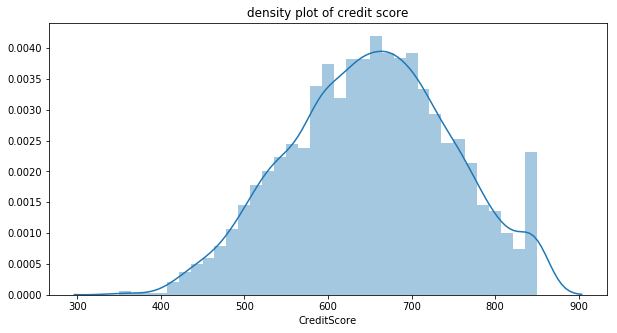

In [27]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(train.CreditScore)
plt.title('density plot of credit score')
#credit score is in range of 350-850...and high score has been achieved by good amount of people

Text(0.5, 1.0, 'churn vs credit score')

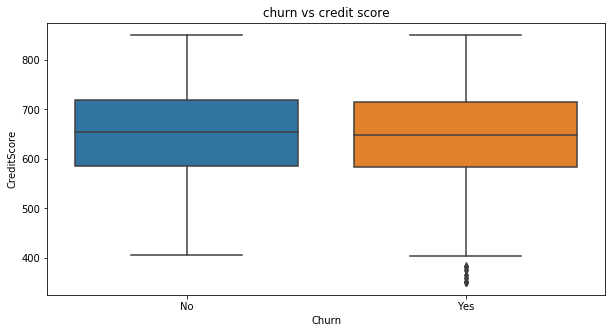

In [28]:
sns.boxplot(x='Churn',y='CreditScore',data=train)
plt.title('churn vs credit score')
#observations----churn does'nt depend more on credit score.....few potential outliers in churn-yes plot

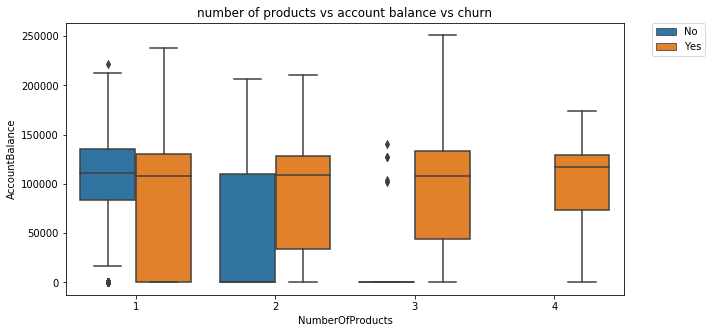

In [29]:
sns.boxplot(x='NumberOfProducts',y='AccountBalance',hue='Churn',data=train)
plt.title('number of products vs account balance vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----people who churn nearly have same account balance

Text(0.5, 1.0, 'churv vs account balance')

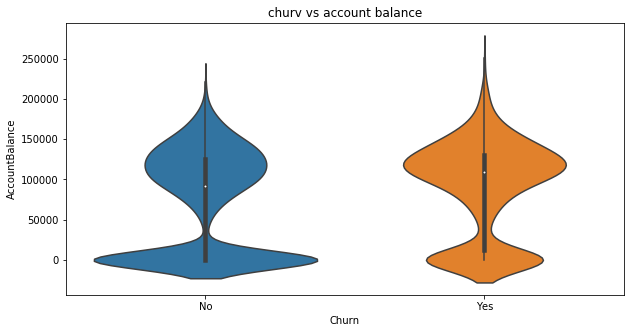

In [30]:
sns.violinplot(x='Churn',y='AccountBalance',data=train)
plt.title('churv vs account balance')
#people who churn usually have more account balance that who stay

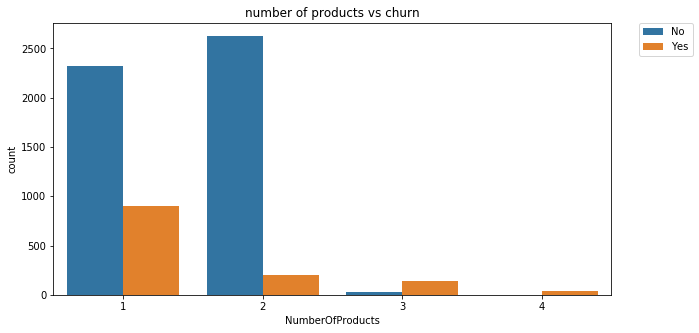

In [31]:
sns.countplot(x='NumberOfProducts',data=train,hue='Churn')
plt.title('number of products vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----people who opt for more than 2 products have high probability of churning.

Text(0.5, 1.0, 'credit card customer count')

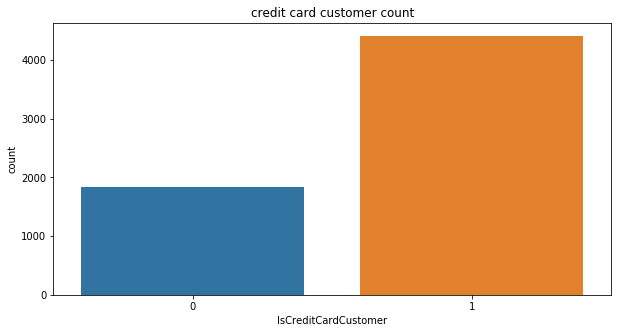

In [32]:
sns.countplot('IsCreditCardCustomer',data=train)
plt.title('credit card customer count')
#observations----large number of customers have opted for credit cards

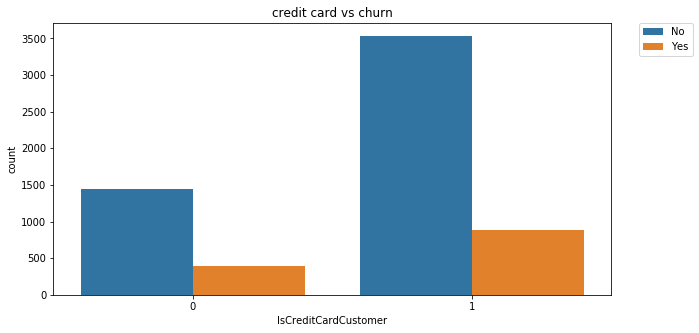

In [34]:
sns.countplot('IsCreditCardCustomer',data=train,hue='Churn')
plt.title('credit card vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----churning is proportional to count

Text(0.5, 1.0, 'active member count')

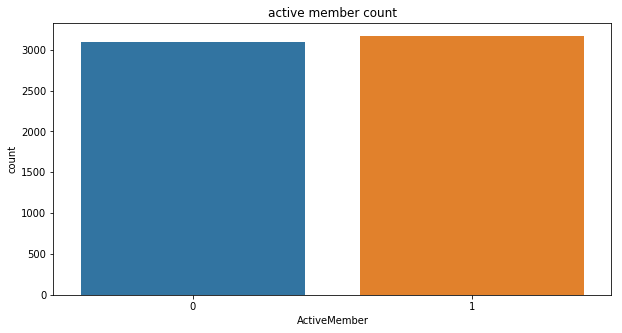

In [35]:
sns.countplot(x='ActiveMember',data=train)
plt.title('active member count')
#observations----there are as many active members as there are inactive members.

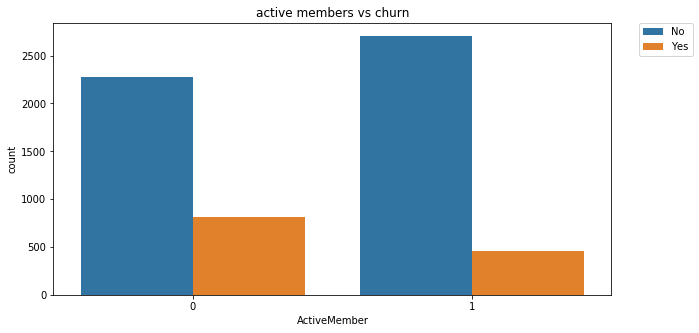

In [36]:
sns.countplot(x='ActiveMember',data=train,hue='Churn')
plt.title('active members vs churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#observations----customers who are inactive tend to churn out more than
#                customers who are active

Text(0.5, 1.0, 'density plot of salary')

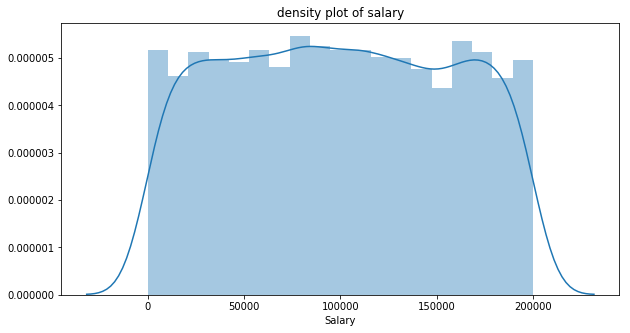

In [37]:
sns.distplot(train.Salary)
plt.title('density plot of salary')
#observations----customers ranging from 0 income(maybe_house_wifes) to high income
#                customers are equally distributed along the range

Text(0.5, 1.0, 'churn vs salary')

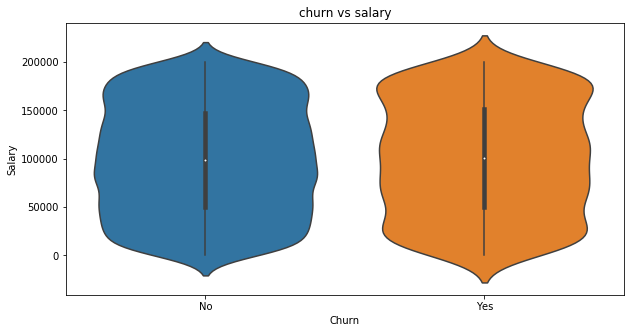

In [38]:
sns.violinplot(x='Churn',y='Salary',data=train)
plt.title('churn vs salary')
#observations----people who churn have similar salary to those who stay

In [0]:
#creating a function which takes a dataframe and outputs a dataframe
#which has some columns dropped and some added all related to date_time.

def date_related(df):
  #converting columns into string since we need to combine these columns later
  df['yearofBirth']=(df.loc[:,'yearofBirth']).astype('str')
  df['monthofBirth']=(df.loc[:,'monthofBirth']).astype('str')
  df['dayofBirth']=(df.loc[:,'dayofBirth']).astype('str')
  df['yearofEntry']=(df.loc[:,'yearofEntry']).astype('str')
  df['monthofEntry']=(df.loc[:,'monthofEntry']).astype('str')
  df['dayofEntry']=(df.loc[:,'dayofEntry']).astype('str')

  #joining customer's birth columns into one and entry columns into one
  #separating with character '-'
  df['customer_dob'] = df[['yearofBirth', 'monthofBirth','dayofBirth']].apply(lambda x: '-'.join(x), axis=1)  
  df['customer_entry'] = df[['yearofEntry', 'monthofEntry','dayofEntry']].apply(lambda x: '-'.join(x), axis=1)

  #converting customer dob(date of birth) and customer entry columns into date_time
  df['customer_dob']=pd.to_datetime(df.loc[:,'customer_dob']) 
  df['customer_entry']=pd.to_datetime(df.loc[:,'customer_entry']) 


  #dropping columns from which we have taken all the information
  #and are no more use full....unless you want into increase features:p
  cols=['yearofBirth','monthofBirth','dayofBirth','yearofEntry','monthofEntry','dayofEntry']
  df.drop(cols,axis=1,inplace=True)

  #getting the latest entry of customer so that we can get date when this data has been published
  latest_entry=np.max(df.customer_entry)

  #customers age when he entered the company...dividing with 8760 hours since
  #we have 8760 hours in year and rounding off to 2 decimals
  df['age_when_entered']=round(((df.customer_entry-df.customer_dob).astype('timedelta64[h]').abs())/8760,2)
  df['time_spent_with_company']=round(((latest_entry-df.customer_entry).astype('timedelta64[h]').abs())/8760,2)



  return df 	 	

In [0]:
train=date_related(train)
val=date_related(val)
test=date_related(test)

In [39]:
train.dtypes

CustomerID                         object
CustomerName                       object
Gender                             object
Location                           object
Education                          object
MaritalStatus                      object
Occupation                         object
Ownhouse                           object
CreditScore                         int64
AccountBalance                    float64
NumberOfProducts                    int64
IsCreditCardCustomer                int64
ActiveMember                        int64
Salary                            float64
Churn                              object
customer_dob               datetime64[ns]
customer_entry             datetime64[ns]
age_when_entered                  float64
time_spent_with_company           float64
dtype: object

In [40]:
train.describe(include='all')

,CustomerID,CustomerName,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,customer_dob,customer_entry,age_when_entered,time_spent_with_company
count,6256,6256,6256,6256,6256,6256,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256,6256,6256,6256.000000,6256.000000
unique,6256,6256,2,3,4,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4835,2968,NaN,NaN
top,C2705882,Name_4650236,Male,Location11,primary,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,No,1973-03-24 00:00:00,2013-12-18 00:00:00,NaN,NaN
freq,1,1,3414,3123,1586,2185,2702,3134,NaN,NaN,NaN,NaN,NaN,NaN,4979,5,8,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926-05-13 00:00:00,2008-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-10 00:00:00,2018-12-28 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.556905,76155.918055,1.520780,0.705243,0.506394,99459.800777,NaN,NaN,NaN,33.976873,5.497433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.556730,62321.558343,0.577945,0.455970,0.499999,57332.516626,NaN,NaN,NaN,10.914879,2.913223
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,NaN,NaN,NaN,7.150000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,50403.620000,NaN,NaN,NaN,26.580000,2.980000


Text(0.5, 1.0, 'churn vs age')

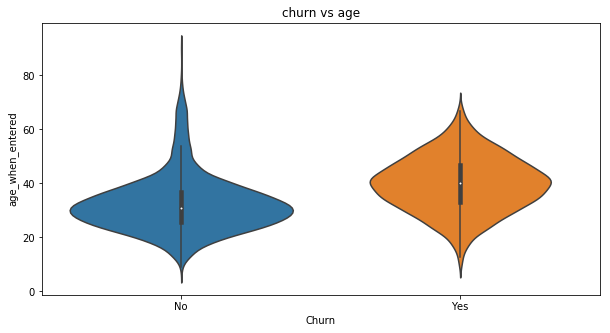

In [43]:
sns.violinplot(x='Churn',y='age_when_entered',data=train)
plt.title('churn vs age')
#observations----people who entered the company a bit older tend to churn out

In [42]:
train.dtypes

CustomerID                         object
CustomerName                       object
Gender                             object
Location                           object
Education                          object
MaritalStatus                      object
Occupation                         object
Ownhouse                           object
CreditScore                         int64
AccountBalance                    float64
NumberOfProducts                    int64
IsCreditCardCustomer                int64
ActiveMember                        int64
Salary                            float64
Churn                              object
customer_dob               datetime64[ns]
customer_entry             datetime64[ns]
age_when_entered                  float64
time_spent_with_company           float64
dtype: object

In [0]:
#creating functions to convert selected columns into categories

def columns_train_val(df):
  unwanted_cols=['CustomerID','CustomerName','customer_dob','customer_entry']
  df.drop(unwanted_cols,axis=1,inplace=True)
  to_cat_cols=['Gender','Location','Education','MaritalStatus','Occupation',
               'Ownhouse','NumberOfProducts','IsCreditCardCustomer','ActiveMember','Churn']
  df.loc[:,to_cat_cols]=df.loc[:,to_cat_cols].astype('category')
  return df
#2nd function is created since test doesnt have target but above function also uses
#target variable 
def columns_test(df):
  unwanted_cols=['CustomerID','CustomerName','customer_dob','customer_entry']
  df.drop(unwanted_cols,axis=1,inplace=True)
  to_cat_cols=['Gender','Location','Education','MaritalStatus','Occupation',
               'Ownhouse','NumberOfProducts','IsCreditCardCustomer','ActiveMember']
  df.loc[:,to_cat_cols]=df.loc[:,to_cat_cols].astype('category')
  return df


In [45]:
train=columns_train_val(train)
val=columns_train_val(val)
test=columns_test(test)
train.dtypes

Gender                     category
Location                   category
Education                  category
MaritalStatus              category
Occupation                 category
Ownhouse                   category
CreditScore                   int64
AccountBalance              float64
NumberOfProducts           category
IsCreditCardCustomer       category
ActiveMember               category
Salary                      float64
Churn                      category
age_when_entered            float64
time_spent_with_company     float64
dtype: object

In [0]:
#splitting the data into predictors and target
def splitting_y(df):
  df_x=df.loc[:,df.columns!='Churn']
  df_y=df['Churn']
  return df_x,df_y

In [0]:
train_x,train_y=splitting_y(train)
val_x,val_y=splitting_y(val)
test_x=test

In [48]:
print('train_x shape:',train_x.shape)
print('train_y shape:',train_y.shape)
print('val_x shape:',val_x.shape)
print('val_y shape:',val_y.shape)
print('test_x shape:',test_x.shape)

train_x shape: (6256, 14)
train_y shape: (6256,)
val_x shape: (1104, 14)
val_y shape: (1104,)
test_x shape: (1840, 14)


In [0]:
#separating numerical and categorical columns for standardization and dummification
num_cols=['CreditScore','AccountBalance','Salary','age_when_entered','time_spent_with_company']
cat_cols=['Gender','Location','Education','MaritalStatus','Occupation',
          'Ownhouse','NumberOfProducts','IsCreditCardCustomer','ActiveMember']

train_num_x=train_x.loc[:,num_cols]
train_cat_x=train_x.loc[:,cat_cols]
val_num_x=val_x.loc[:,num_cols]
val_cat_x=val_x.loc[:,cat_cols]
test_num_x=test_x.loc[:,num_cols]
test_cat_x=test_x.loc[:,cat_cols]

In [0]:
#standardizing the numerical columns using standardscaler()
scaler = StandardScaler()
scaler.fit(train_num_x[train_num_x.columns])
train_num_x[train_num_x.columns] = scaler.transform(train_num_x[train_num_x.columns])
val_num_x[val_num_x.columns] = scaler.transform(val_num_x[val_num_x.columns])
test_num_x[test_num_x.columns] = scaler.transform(test_num_x[test_num_x.columns])

In [51]:
train_num_x.describe()

,CreditScore,AccountBalance,Salary,age_when_entered,time_spent_with_company
count,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03
mean,3.691279e-18,1.465509e-16,8.848421e-17,3.815061e-17,-1.045271e-16
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-3.123356e+00,-1.222081e+00,-1.734725e+00,-2.458022e+00,-1.887213e+00
25%,-6.997162e-01,-1.222081e+00,-8.557116e-01,-6.777413e-01,-8.642093e-01
50%,1.494676e-02,3.260204e-01,-9.055372e-03,-1.399004e-01,7.747070e-03
75%,6.881799e-01,8.191496e-01,8.603898e-01,5.035389e-01,8.488073e-01
max,2.055361e+00,2.804104e+00,1.753263e+00,5.224766e+00,1.888976e+00


In [0]:
#creating dummy variables of categorical variables
train_dummy_x=pd.get_dummies(train_cat_x,drop_first=True)
val_dummy_x=pd.get_dummies(val_cat_x,drop_first=True)
test_dummy_x=pd.get_dummies(test_cat_x,drop_first=True)

In [0]:
#combining standardized numerical dataframe and dummyfied categorical dataframe.
full_train_x=pd.concat([train_num_x,train_dummy_x],axis=1)
full_val_x=pd.concat([val_num_x,val_dummy_x],axis=1)
full_test_x=pd.concat([test_num_x,test_dummy_x],axis=1)

In [54]:
full_train_x.describe()

,CreditScore,AccountBalance,Salary,age_when_entered,time_spent_with_company,Gender_Male,Location_Location12,Location_Location13,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_unknown,Ownhouse_yes,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
count,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000
mean,3.691279e-18,1.465509e-16,8.848421e-17,3.815061e-17,-1.045271e-16,0.545716,0.250000,0.250799,0.253197,0.244565,0.248721,0.336317,0.349265,0.105339,0.046835,0.103101,0.102941,0.103740,0.106138,0.026055,0.472986,0.452685,0.025895,0.005435,0.705243,0.506394
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,0.497945,0.433047,0.433508,0.434878,0.429863,0.432306,0.472487,0.476776,0.307014,0.211302,0.304115,0.303906,0.304948,0.308039,0.159312,0.499310,0.497796,0.158835,0.073526,0.455970,0.499999
min,-3.123356e+00,-1.222081e+00,-1.734725e+00,-2.458022e+00,-1.887213e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.997162e-01,-1.222081e+00,-8.557116e-01,-6.777413e-01,-8.642093e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.494676e-02,3.260204e-01,-9.055372e-03,-1.399004e-01,7.747070e-03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,6.881799e-01,8.191496e-01,8.603898e-01,5.035389e-01,8.488073e-01,1.000000,0.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.055361e+00,2.804104e+00,1.753263e+00,5.224766e+00,1.888976e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
print('full train_x shape:',full_train_x.shape)
print('full_val_x shape:',full_val_x.shape)
print('full_test_x shape:',full_test_x.shape)

full train_x shape: (6256, 26)
full_val_x shape: (1104, 26)
full_test_x shape: (1840, 26)


In [56]:
compare_train_val_test(full_train_x,full_val_x,full_test_x)
#no missing levels in different dataframes....yaaayyy:D

,train data types,val data types,test data types,train_missing,val_missing,test_missing,#training levels,#validation levels,#testing levels,val_missing_levels,val_extra_levels,test_missing_levels,test_extra_levels
CreditScore,float64,float64,float64,0,0,0,446,367,403,"{-0.8240053717996797, 1.4132003048047146, 1.73...","{-2.191186618613476, -3.0404961810281073, -2.3...","{1.5478469427484978, 2.0139314587077464, 1.993...","{-2.750488037764575, -2.657271134572725, -2.45..."
AccountBalance,float64,float64,float64,0,0,0,3989,718,1153,"{0.42630024206610884, 1.2139044752388273, 1.65...","{0.44703790222097783, 0.5427594624857779, 0.71...","{0.42630024206610884, 1.2139044752388273, 1.26...","{0.7923829286452575, 1.1551969825563377, 1.442..."
Salary,float64,float64,float64,0,0,0,6255,1104,1840,"{-0.56392230428564, 1.5492412276798575, 1.5537...","{-0.8014878154177669, 1.5390421858384604, 1.64...","{-0.56392230428564, 1.5492412276798575, -0.681...","{0.7377994651906405, 1.661182292450743, 0.6152..."
age_when_entered,float64,float64,float64,0,0,0,3118,932,1444,"{0.8249148763727021, 0.4556646036564871, 2.593...","{0.6755655104850025, 1.1391899223817887, 2.989...","{0.4556646036564871, 1.7063510112436688, 2.593...","{-0.5879484500005097, 1.2518891371314034, 2.40..."
time_spent_with_company,float64,float64,float64,0,0,0,1070,673,842,"{0.8762705295446995, 1.6452399168110956, 1.885...","{0.5158161292635758, 1.8340493645773988, 0.917...","{-0.5552483744289054, 1.885542850331845, -0.55...","{0.2308855080889734, 1.86151255697977, 1.83404..."
Gender_Male,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Location_Location12,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Location_Location13,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Education_secondary,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Education_tertiary,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}


## modelling
## DT

### function to create learning curves

In [0]:
#creating a function which will plot learning curves for our model
#which will help us get bias and variance
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)#if y limits are given consider the specified limits
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    #getting means and std for train and test for particular train_sizes
    #with specified cv.
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    #creating connections between the training score points since we only get points.
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    #similarly for cross validation
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [68]:
#creating a random search for some hyper parameters given in param_grid_1
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
dt=tree.DecisionTreeClassifier()
#creating a parameter grid for randomizedcv to search in
DT_param_grid_1={
    'criterion':['gini','entropy'],#parameter for information gain
    'max_depth':np.arange(4,20,1),#maximum depth of tree
    'min_samples_split':np.arange(0.001,0.1,0.01),#The minimum number of samples required to split an internal node
    'max_features':['log2','sqrt','auto'],#number of features considered for best split
    'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)#minimum fraction of total samples in each leaf
}
#creating randomized search for DT_param_grid_1 with 1500 iterations 
r_search=RandomizedSearchCV(dt,param_distributions=DT_param_grid_1,n_iter=1500,verbose=1,cv=5,n_jobs=-1)
r_search.fit(full_train_x,train_y)
r_search.best_params_#getting the best parameters.

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1418 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 3418 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 6218 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:  1.6min finished


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 0.06099999999999999,
 'min_weight_fraction_leaf': 0.001}

In [0]:
#creating a 2nd grid with values closer to best parameter values of randomized search
#inorder to get finer results using grid search
DT_param_grid_2={
    'criterion':['gini','entropy'],
    'max_depth':(6,7,8,9,10),
    'min_samples_split':np.arange(0.02,0.1,0.0025),
    'max_features':['log2','sqrt','auto'],
    'min_weight_fraction_leaf':np.arange(0.0001,0.25,0.025)
}

In [70]:
dt=tree.DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid = DT_param_grid_2,cv=3,verbose=1,n_jobs=-1)
grid_search.fit(full_train_x,train_y)
grid_search.best_params_#getting best parameters of grid search

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 2308 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 5308 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9508 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 14908 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 21508 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:  5.8min finished


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 0.04749999999999999,
 'min_weight_fraction_leaf': 0.0001}

In [0]:
#creating decision tree classifier with best results form grid search
dt=tree.DecisionTreeClassifier(criterion= 'entropy',max_depth= 10,max_features= 'auto',min_samples_split= 0.04749999999999999,min_weight_fraction_leaf= 0.0001)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

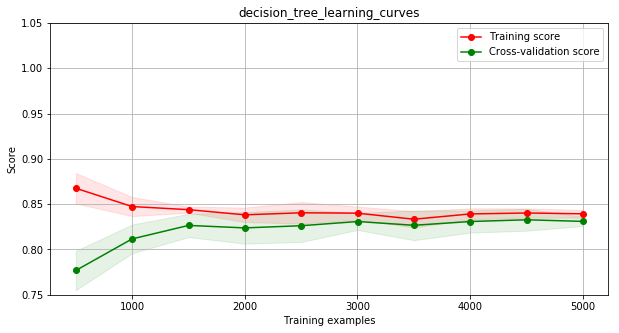

In [72]:
#plotting learning curve for decision tree classifier
plot_learning_curve(estimator=dt,title='decision_tree_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)
#observations----very low variance ok bias

In [77]:
#predicting validation labels
dt.fit(full_train_x,train_y)
dt_predictions_val=dt.predict(full_val_x)
print('Decision tree classification report\n\n')
print(classification_report(val_y,dt_predictions_val))
print('accuracy of model is:',accuracy_score(val_y,dt_predictions_val))
#observations----though accuracy is good but recall score is very low 
#                what more can we expect from decision tree
#                moving forward into building random forest

Decision tree classification report


              precision    recall  f1-score   support

          No       0.83      0.99      0.90       889
         Yes       0.83      0.13      0.23       215

    accuracy                           0.83      1104
   macro avg       0.83      0.56      0.57      1104
weighted avg       0.83      0.83      0.77      1104

accuracy of model is: 0.8260869565217391


## Random forest


In [78]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [0]:
#creating parameter grid for random search
RF_grid_forest_1={'criterion':['gini','entropy'],
      'n_estimators':np.arange(5,200,1),#number of trees you want in forest
      'max_depth':np.arange(5,20,1),#mamimum depth of trees in forest 
      'min_samples_split':np.arange(0.001,0.1,0.01),#The minimum number of samples required to split an internal node
      'max_features':['log2','sqrt','auto'],#maximum featuers to consider while checking for best split
      'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)#minimum fraction of datapoints in each leaf
}


In [83]:
#getting best parameters form random search
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=RF_grid_forest_1,n_iter=1000,n_jobs=-1,cv=3,verbose=1)
rf_random.fit(full_train_x,train_y)
rf_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 11.3min finished


{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.001,
 'n_estimators': 140}

In [0]:
rf=RandomForestClassifier(criterion='entropy',max_depth= 14,max_features= 'auto',min_samples_split= 0.001,min_weight_fraction_leaf= 0.001,n_estimators=140)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

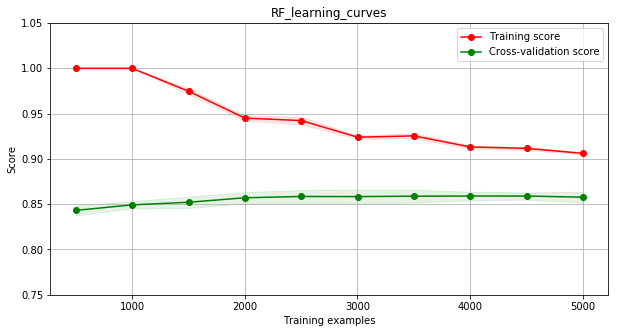

In [85]:
#plotting learning curve with parameters from randomized search random_forest_classifer
plot_learning_curve(estimator=rf,title='RF_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

#observations----okbias....and ok variance

In [0]:
#creating 2nd grid with values closer to best parameters from randomcv
RF_grid_forest_2={'criterion':['entropy'],
      'n_estimators':(135,140,145,150),
      'max_depth':(12,13,14,15,16),
      'min_samples_split':np.arange(0.001,0.01,0.005),
      'max_features':['log2','auto'],    
      'min_weight_fraction_leaf':np.arange(0.0001,0.1,0.005)
}

In [92]:
rf=RandomForestClassifier()
grid_search_rf=GridSearchCV(estimator=rf,param_grid = RF_grid_forest_2,cv=3,n_jobs=-1,verbose=1)
grid_search_rf.fit(full_train_x,train_y)
grid_search_rf.best_params_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 33.0min finished


{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 135}

In [103]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=135,max_depth=16,min_samples_split=0.001,max_features='auto',min_weight_fraction_leaf=0.0001)
rf.fit(full_train_x,train_y)
predictions=rf.predict(full_val_x)
print(classification_report(val_y,predictions))
print(accuracy_score(val_y,predictions))
#observations----accuracy has increased from decision tree and recall score 
#                has increased to 0.38 form 0.13

              precision    recall  f1-score   support

          No       0.87      0.97      0.92       889
         Yes       0.76      0.38      0.51       215

    accuracy                           0.86      1104
   macro avg       0.81      0.68      0.71      1104
weighted avg       0.85      0.86      0.84      1104

0.8559782608695652


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

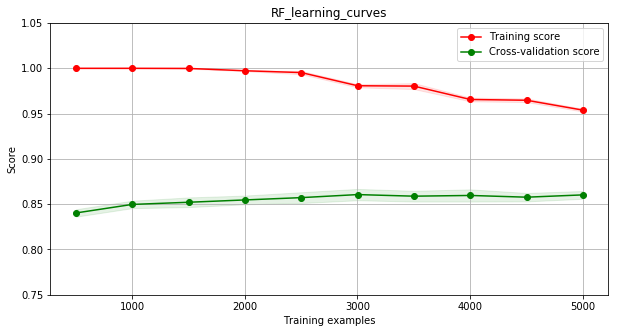

In [105]:
plot_learning_curve(estimator=rf,title='RF_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)
#but variance of our model has increased....indicating model has started overfitting

## Gradient Boosting classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [0]:
#creating parameter grid for randomized search cv for gradient boosting
gbc_param_grid_1={
    'n_estimators':np.arange(50,200,10),
    'learning_rate':np.arange(0.01,0.3,0.01),#howmuch you want to learcn from each tree
    'subsample':np.arange(0.5,1.0,0.1),
    'max_depth':np.arange(2,7,1),
    'max_features':['sqrt','log2']
}

In [114]:
random_gbc=RandomizedSearchCV(estimator=gbc,param_distributions=gbc_param_grid_1,n_jobs=-1,n_iter=1500,verbose=1)
random_gbc.fit(full_train_x,train_y)
random_gbc.best_params_

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 25.0min finished


{'learning_rate': 0.04,
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 180,
 'subsample': 0.7}

In [0]:
gradient_boosting=GradientBoostingClassifier(learning_rate= 0.04,max_depth= 6,max_features= 'sqrt',n_estimators= 180,subsample= 0.7)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

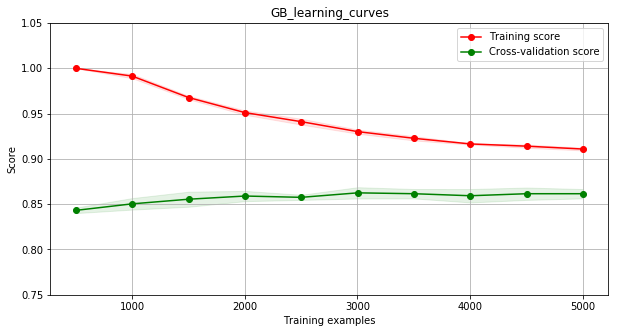

In [119]:
#plotting a learning curve for gradient boosting form best parameters from
#randomized search cv
plot_learning_curve(estimator=gradient_boosting,title='GB_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)
#observations----good bias and variance and we can improve the parameters from grid search

In [0]:
#2nd parameter grid for refining the hyper_parameters using grid search
gbc=GradientBoostingClassifier()
gbc_param_grid_2={
    'n_estimators':(160,170,175,180,185,190,200),
    'learning_rate':np.arange(0.01,0.1,0.005),
    'subsample':np.arange(0.5,0.9,0.05),
    'max_depth':(5,6,7),
    'max_features':['sqrt']
}

In [127]:
grid_search_gbc=GridSearchCV(estimator=gbc,param_grid=gbc_param_grid_2,n_jobs=-1,cv=3,verbose=1)
grid_search_gbc.fit(full_train_x,train_y)
grid_search_gbc.best_params_

Fitting 3 folds for each of 3024 candidates, totalling 9072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 104.1min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 122.4min
[Parallel(n_jobs=-1)]: Done 9072 out of 9072 | elapsed: 132.3min finished


{'learning_rate': 0.034999999999999996,
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 180,
 'subsample': 0.55}

In [0]:
gradient_boosting=GradientBoostingClassifier(learning_rate= 0.034999999999999996,max_depth= 7,max_features= 'sqrt',n_estimators= 180,subsample= 0.55)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

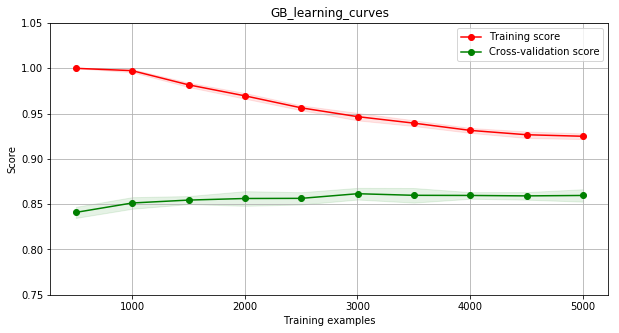

In [129]:
plot_learning_curve(estimator=gradient_boosting,title='GB_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)
#observations----there is bias and variance in our model
#                from next step will try to simplify the models

In [130]:
gradient_boosting.fit(full_train_x,train_y)
val_predictions=gradient_boosting.predict(full_val_x)
print(classification_report(val_y,val_predictions))
print(accuracy_score(val_y,val_predictions))
#observations----recall has increased but there is variance in the model

              precision    recall  f1-score   support

          No       0.87      0.97      0.92       889
         Yes       0.74      0.41      0.53       215

    accuracy                           0.86      1104
   macro avg       0.81      0.69      0.72      1104
weighted avg       0.85      0.86      0.84      1104

0.8577898550724637


In [0]:
test_predictions=gradient_boosting.predict(full_test_x)


In [133]:
test_predictions

array(['No', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [0]:
submission_GBC = pd.DataFrame(list(zip(test_id, test_predictions)), columns =['CustomerID', 'Churn'])

In [137]:
submission_GBC.head()

,CustomerID,Churn
0,C5993228,No
1,C6546925,No
2,C7491750,Yes
3,C8462011,No
4,C3187447,No


In [0]:
submission_GBC['Churn']=[1 if x=='Yes' else 0 for x in submission_GBC['Churn']]

In [139]:
submission_GBC.head()

,CustomerID,Churn
0,C5993228,0
1,C6546925,0
2,C7491750,1
3,C8462011,0
4,C3187447,0


In [140]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
submission_GBC.to_csv('submission_GBC.csv',index=False)
!cp submission_GBC.csv drive/My\ Drive/

In [0]:
#reducing the number of hyper_parameters
gbc_param_grid_1={
    'n_estimators':np.arange(150,200,5),
    'learning_rate':np.arange(0.01,0.3,0.1),
    'max_depth':np.arange(2,7,1),
    'max_features':['sqrt','log2']
}

In [77]:
gbc=GradientBoostingClassifier(learning_rate= 0.11,max_depth= 4,max_features= 'sqrt',n_estimators= 150)
gbc.fit(full_train_x,train_y)
predictions=gbc.predict(full_val_x)
print(classification_report(val_y,predictions))
print(accuracy_score(val_y,predictions))
#observations----best recall score 

              precision    recall  f1-score   support

          No       0.88      0.97      0.92       889
         Yes       0.76      0.44      0.56       215

    accuracy                           0.86      1104
   macro avg       0.82      0.70      0.74      1104
weighted avg       0.85      0.86      0.85      1104

0.8641304347826086


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

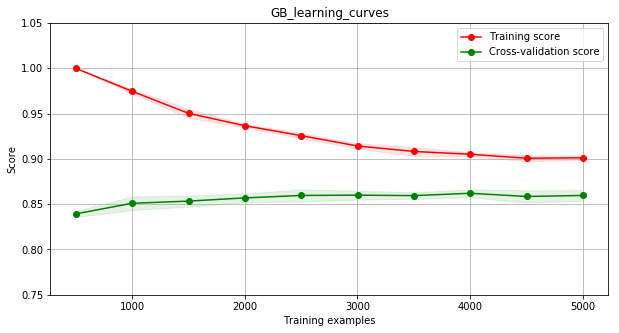

In [78]:
plot_learning_curve(estimator=gbc,title='GB_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)
#best recall and good variance and bias 
#using this model to predict test

In [0]:
new_predictions=gbc.predict(full_test_x)
new_submission_GBC = pd.DataFrame(list(zip(test_id, new_predictions)), columns =['CustomerID', 'Churn'])
new_submission_GBC['Churn']=[1 if x=='Yes' else 0 for x in new_submission_GBC['Churn']]
new_submission_GBC.to_csv('new_submission_GBC2.csv',index=False)